In [1]:
import pandas as pd
df_multiple_sheets = pd.read_excel('california_vehicle.xlsx',sheet_name=["County", "ZIP"])

In [2]:
county_df = df_multiple_sheets['County']
zipcode_df = df_multiple_sheets['ZIP']

In [8]:
print(len(county_df))
county_df.head()

33542


,Data Year,County,Dashboard Fuel Type Group,Fuel Type,Make,Model,Number of Vehicles
0,2010,Alameda,Battery Electric (BEV),Battery Electric (BEV),Ford,Ranger,3
1,2010,Alameda,Battery Electric (BEV),Battery Electric (BEV),Tesla,Roadster,17
2,2010,Alameda,Diesel,Diesel,NaN,NaN,10939
3,2010,Alameda,Gasoline,Flex Fuel,NaN,NaN,10974
4,2010,Alameda,Gasoline,Gasoline,NaN,NaN,840577


In [6]:
county_df['County'].unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Out Of State', 'Placer', 'Plumas', 'Riverside', 'Sacramento',
       'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou',
       'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity',
       'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba', 'Out of State'],
      dtype=object)

In [10]:
cali_county_df = county_df[~county_df['County'].isin(['Out of State','Out Of State'])]
cali_county_df['County'].unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [12]:
fuel_types = cali_county_df['Fuel Type'].unique()

In [16]:
statewide_vehicle_totals = county_df.groupby(['Fuel Type', 'Data Year'])['Number of Vehicles'].sum().reset_index()
statewide_vehicle_totals.head()

,Fuel Type,Data Year,Number of Vehicles
0,Battery Electric (BEV),2010,601
1,Battery Electric (BEV),2011,4375
2,Battery Electric (BEV),2012,7902
3,Battery Electric (BEV),2013,25146
4,Battery Electric (BEV),2014,50175


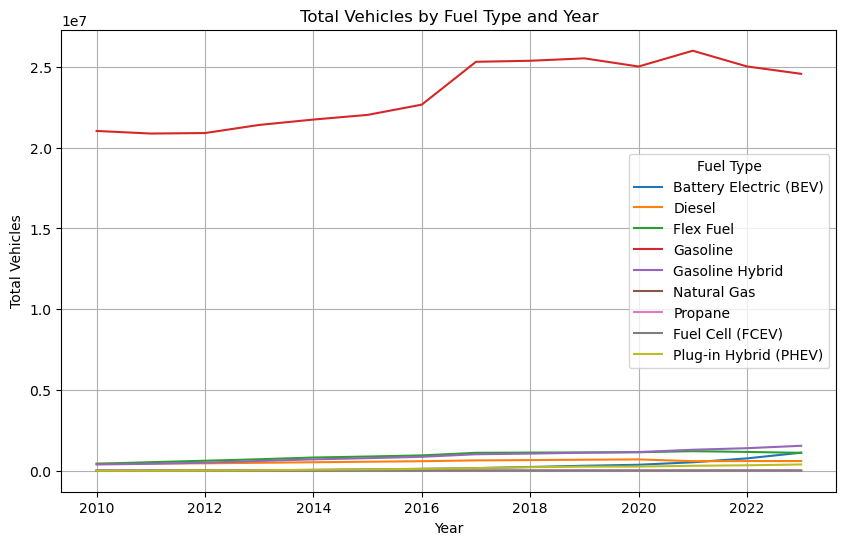

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for fuel_type in fuel_types:
    fuel_data = statewide_vehicle_totals[statewide_vehicle_totals['Fuel Type'] == fuel_type]
    plt.plot(fuel_data['Data Year'], fuel_data['Number of Vehicles'], label=fuel_type)

plt.title('Total Vehicles by Fuel Type and Year')
plt.xlabel('Year')
plt.ylabel('Total Vehicles')

plt.legend(title='Fuel Type')

plt.grid(True)
plt.show()
